In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *
import cmocean
import random
import calendar

from IPython.html.widgets import interact, interactive
from IPython.display import clear_output, display, HTML

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
pert_rest = RunRead()
pert_rest.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_restoring/results/')
pert_rest.readMonitorData([6220800,6480000,6492960,6544800,6570720])
pert_rest.readMonitorSeaiceData([6220800,6480000,6492960,6544800,6570720])
pert_rest.readDynStData([6220800,6480000,6492960,6544800,6570720])
pert_rest.readStateData(range(12*6,12*26,1))
pert_rest.baroCalc()
pert_rest.mxldepthread(range(12))
pert_rest.seaiceread(range(12*6,12*26,1))
pert_rest.fluxCalc()
pert_rest.title('Restoring','green')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/core/_methods.py:59: RuntimeWarning: Mean of empty slice.
  warnings.warn("Mean of empty slice.", RuntimeWarning)
/noc/users/am8e13/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:598: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_restoring/results/


In [3]:
pert_norest = RunRead()
pert_norest.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_norestorign/results/')
pert_norest.readMonitorData([6220800,6480000,6492960])
pert_norest.readMonitorSeaiceData([6220800,6480000,6492960])
pert_norest.readDynStData([6220800,6480000,6492960])
pert_norest.readStateData(range(12*6,12*26,1))
pert_norest.baroCalc()
pert_norest.mxldepthread(range(12))
pert_norest.seaiceread(range(12*6,12*26,1))
pert_norest.fluxCalc()
pert_norest.title('No restoring','blue')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_norestorign/results/


In [4]:
pert_const = RunRead()
pert_const.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_contsalt/results/')
pert_const.readMonitorData([6220800,6480000])
pert_const.readMonitorSeaiceData([6220800,6480000])
pert_const.readDynStData([6220800,6480000])
pert_const.readStateData(range(12*6,12*26,1))
pert_const.baroCalc()
pert_const.mxldepthread(range(12))
pert_const.seaiceread(range(12*6,12*26,1))
pert_const.fluxCalc()
pert_const.title('Constant','red')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/experiments/exp_contsalt/results/


In [5]:
pert = { 'pert_const' : pert_const ,  'pert_norest' : pert_norest , 'pert_rest' : pert_rest}
region = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl' }

In [6]:
def plot_lv(monitor_list,var,reg,vimin,vimax,cmap,row=4,col=3):
    file2read1 = netcdf.NetCDFFile("/scratch/general/am8e13/results36km/grid.nc",'r')
    Z = file2read1.variables['Zp1']
    Z = Z[0:50]*1
    fig, axes = plt.subplots(nrows=row, ncols=col)
    ax_ind = 0
    for mon in monitor_list:
        #print mon
        ca = axes.flat[ax_ind].imshow(monitor_list[mon].dataDyn[var][0:36*20,0,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind], )
        axes.flat[ax_ind].set_title(monitor_list[mon].title+' Global')
        axes.flat[ax_ind].set_xlabel('Years')
        axes.flat[ax_ind].set_ylabel('Depth')
        
        ca = axes.flat[ax_ind + 3].imshow(monitor_list[mon].dataDyn[var][0:36*20,1,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + 3], )
        axes.flat[ax_ind + 3].set_title(monitor_list[mon].title+' '+region[1])
        axes.flat[ax_ind + 3].set_xlabel('Years')
        axes.flat[ax_ind + 3].set_ylabel('Depth')
        
        ca = axes.flat[ax_ind + 6].imshow(monitor_list[mon].dataDyn[var][0:36*20,2,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + 6], )
        axes.flat[ax_ind + 6].set_title(monitor_list[mon].title+' '+region[2])
        axes.flat[ax_ind + 6].set_xlabel('Years')
        axes.flat[ax_ind + 6].set_ylabel('Depth')
        
        ca = axes.flat[ax_ind + 9].imshow(monitor_list[mon].dataDyn[var][0:36*20,3,:].T,vmin = vimin, vmax = vimax,\
                    interpolation='nearest', cmap = cmap ,origin='upper', aspect='auto')
        cbar = fig.colorbar(ca , ax=axes.flat[ax_ind + 9], )
        axes.flat[ax_ind + 9].set_title(monitor_list[mon].title+' '+region[3])
        axes.flat[ax_ind + 9].set_xlabel('Years')
        axes.flat[ax_ind + 9].set_ylabel('Depth')
        ax_ind += 1
    fig.subplots_adjust(right=2.8,top=2.8)

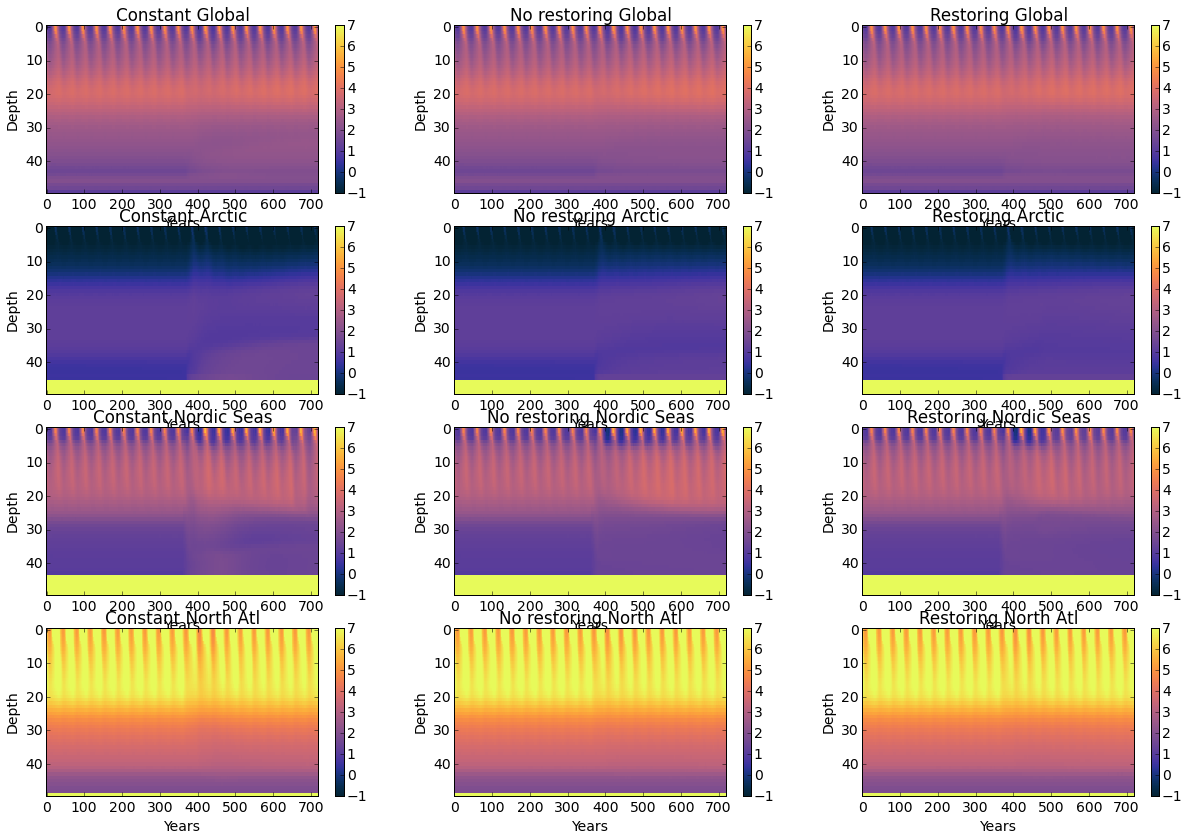

In [7]:
plot_lv(pert,'theta_lv_mean',3,-1,7,cmocean.cm.temperature)

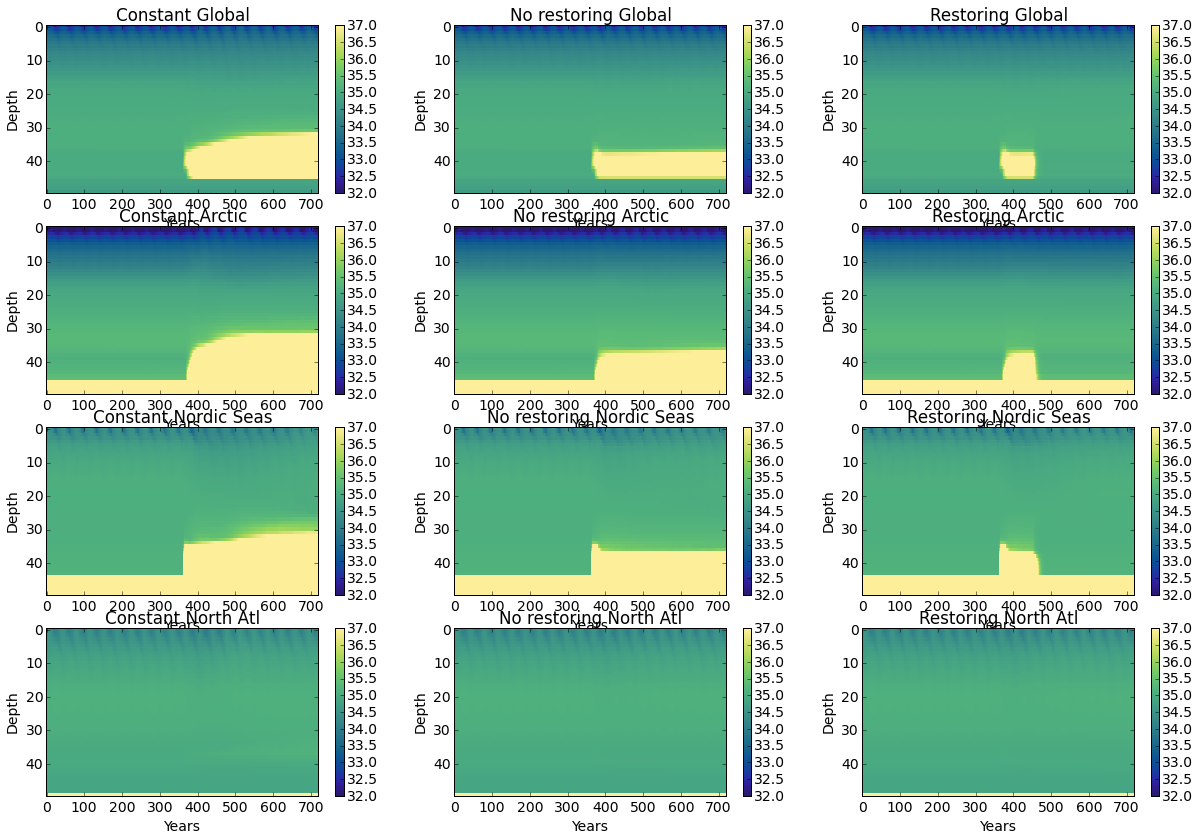

In [8]:
plot_lv(pert,'salt_lv_mean',0,32,37,cmocean.cm.salinity)

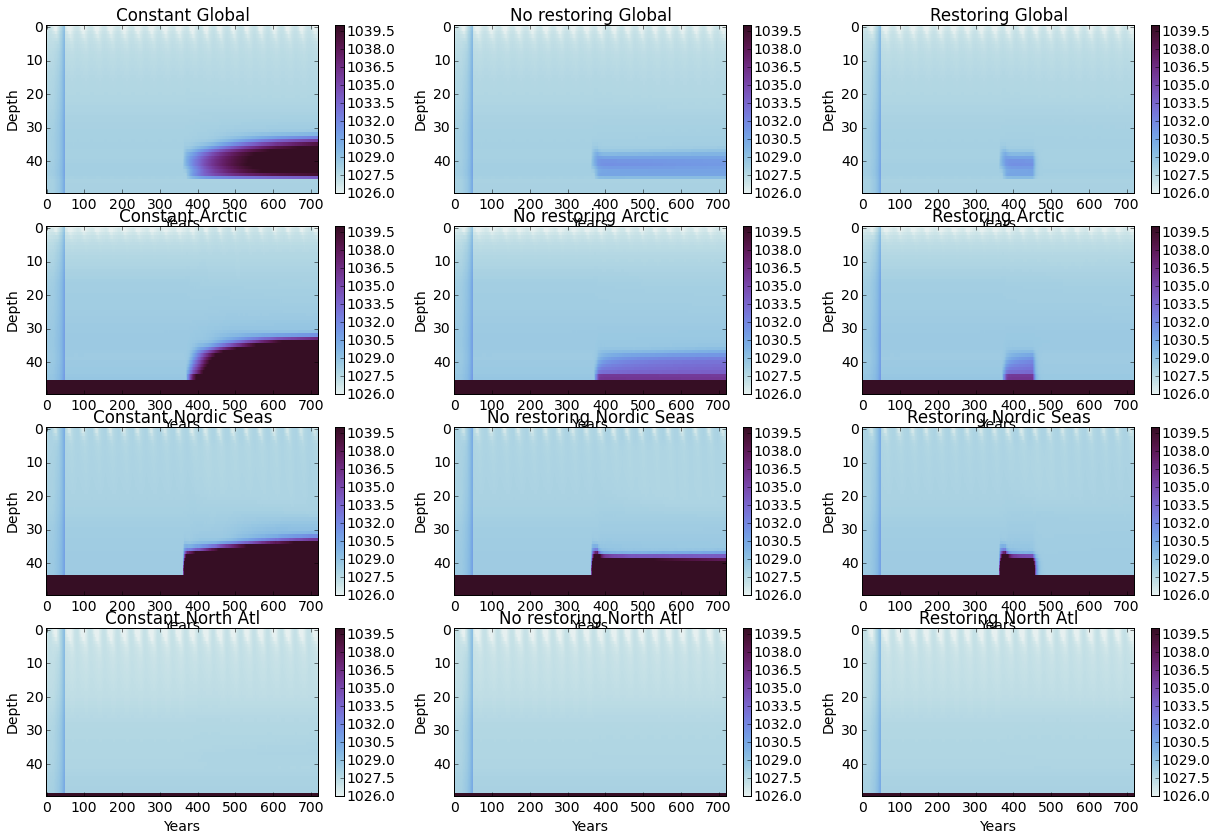

In [9]:
plot_lv(pert,'rho_lv_mean',0,1026,1040,cmocean.cm.density)

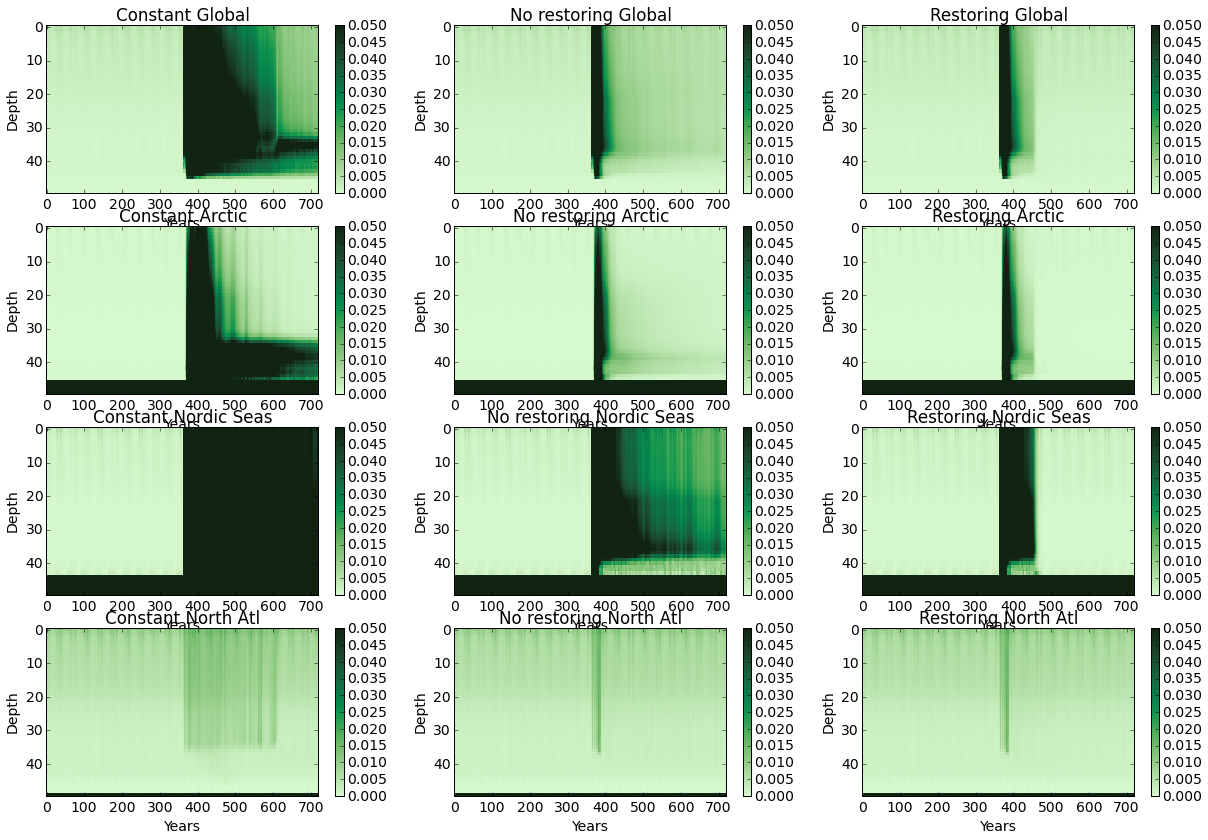

In [10]:
plot_lv(pert,'ke_lv_mean',0,0,0.05,cmocean.cm.chlorophyll)

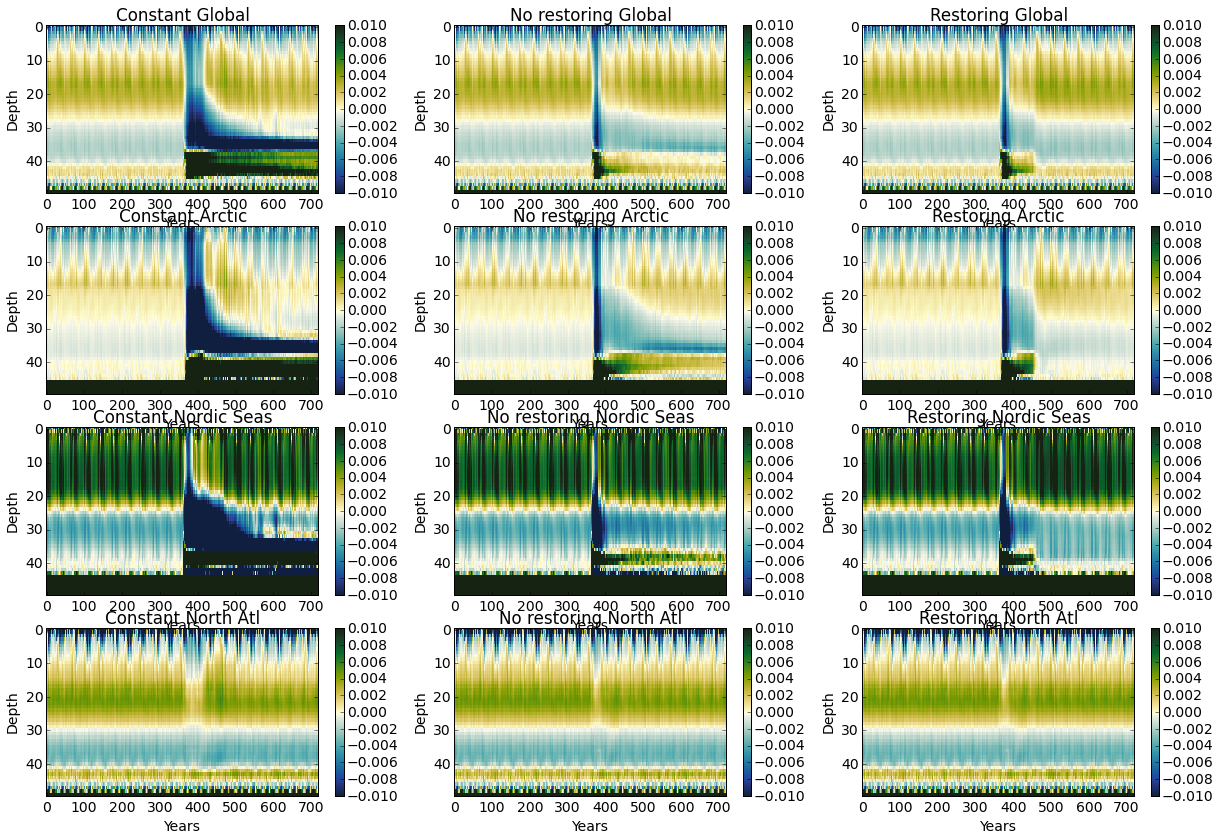

In [11]:
plot_lv(pert,'uvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

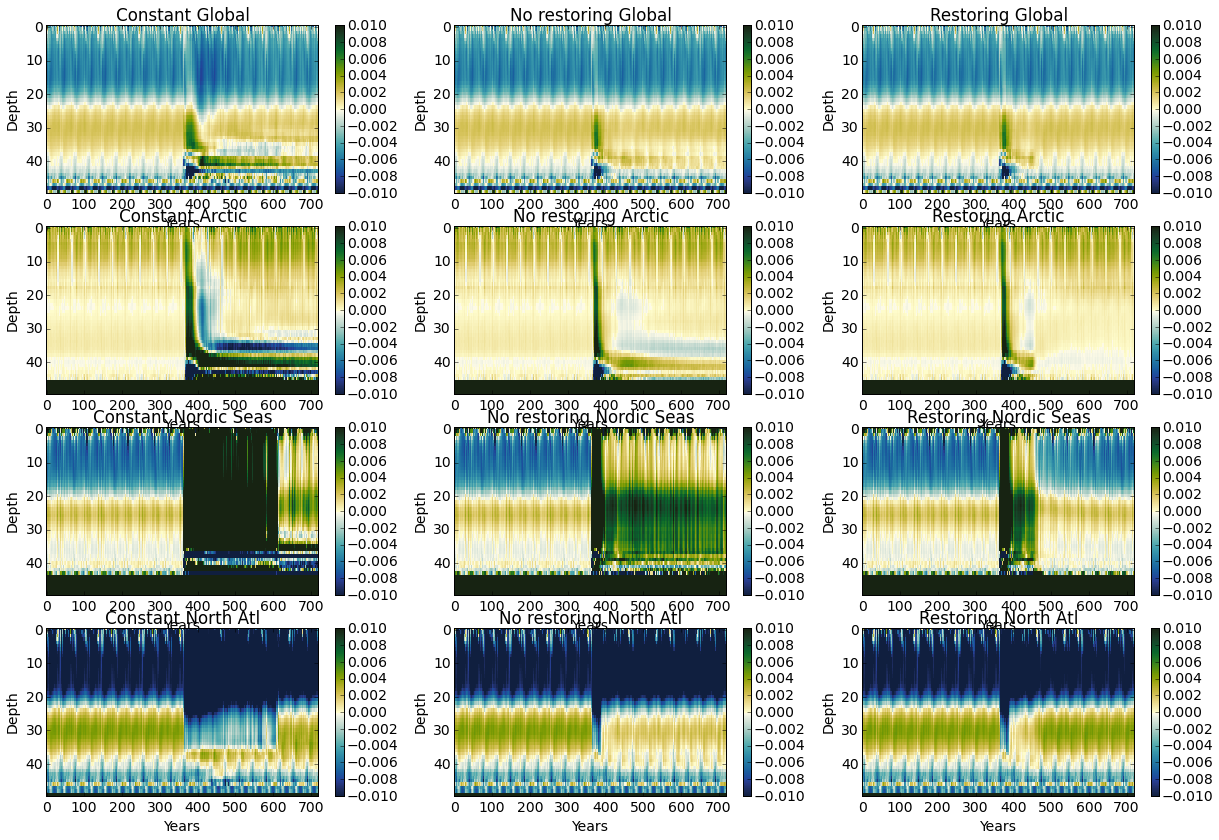

In [12]:
plot_lv(pert,'vvel_lv_mean',0,-0.01,0.01,cmocean.cm.velocity)

In [13]:
def runningMeanFast(x, N):
    return np.convolve(x, np.ones((N,))/N)[(N-1):]

In [14]:
pert_const.dataDyn['time_lv_years']

array([  0.00000000e+00,   2.77777778e-02,   5.55555556e-02, ...,
         2.99166667e+01,   2.99444444e+01,   2.99722222e+01])

In [56]:
def plot_dynSt(monitor_list,var_list,reg,row=2,col=3):
    # this function is meant to plot monitor variables   
    
    titles = {'theta_mean' : 'Temperature Mean', 'theta_min' : 'Temperature Min',\
              'theta_max' :  'Temperature Max', 'eta_mean' : 'ETA mean', 'eta_max' : 'ETA max',\
              'eta_min' : 'ETA min', 'salt_mean' : 'Salinity Mean' , 'salt_max' : 'Salinity Max',\
              'salt_min' : 'Salinity Min' , 'sss_mean': 'SSS mean' ,'sss_max' : 'SSS max',\
              'sss_min' : 'SSS min', 'sst_mean' : 'SST mean', 'sst_max' : 'SST max' ,'sst_min' : 'SST min',\
              'vvel_mean' : 'V mean', 'vvel_max' : 'V max' , 'vvel_min' : 'V min', 'uvel_mean' : 'U mean',\
              'uvel_max' : 'U max', 'uvel_min' : 'U min', 'ke_mean' : 'Kinetic mean', 'ke_max' : 'Kinetic max',\
              'ke_vol' : 'Kinetic volume', 'seaice_area_max' : 'Seaice area max',\
              'seaice_area_min' : 'Seaice area min', 'seaice_area_mean' : 'Seaice area mean', \
              'seaice_heff_max' : 'Seaice thickness max', 'seaice_heff_min' : 'Seaicea thickness max', \
              'seaice_heff_mean' : 'Seaice thickness mean', 'time_seconds' : 'Time seconds' , \
                'time_years' : 'Time years'}
    unity = {'theta_mean' : 'C', 'theta_min' : 'C', 'theta_max' :  'C', \
                 'eta_mean' : 'm', 'eta_max' : 'm', 'eta_min' : 'm', 'salt_mean' : 'psu' , \
                 'salt_max' : 'psu' , 'salt_min' : 'psu' , 'sss_mean': 'psu' , \
                 'sss_max' : 'psu', 'sss_min' : 'psu', 'sst_mean' : 'C', 'sst_max' : 'C' , \
                 'sst_min' : 'C', 'vvel_mean' : 'm/s', 'vvel_max' : 'm/s' , 'vvel_min' : 'm/s', \
                 'uvel_mean' : 'm/s', 'uvel_max' : 'm/s', 'uvel_min' : 'm/s', 'ke_mean' : 'm^2/s^2', \
                 'ke_max' : 'm^2/s^2', 'ke_vol' : 'm^2/s^2', 'seaice_area_max' : '%', \
                 'seaice_area_min' : '%', 'seaice_area_mean' : '%', \
                 'seaice_heff_max' : 'm', 'seaice_heff_min' : 'm', \
                 'seaice_heff_mean' : 'm', 'time_seconds' : 's' , \
                 'time_years' : 'Years'}
    region = { 0 : 'Global' , 1 : 'Arctic' , 2 : 'Nordic Seas' , 3 : 'North Atl' }
    
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            if reg == 'all':
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,0,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,1,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,2,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,3,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,0,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,1,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,2,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,3,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].set_title(titles[var])
            else:
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'],\
                                       monitor_list[mon].dataDyn[var][1:,reg,0],monitor_list[mon].color,alpha=0.2)
                axes.flat[ax_ind].plot(monitor_list[mon].dataDyn['time_lv_years'][0:-12*3],\
                                       runningMeanFast(monitor_list[mon].dataDyn[var][1:,reg,0],12*3)[0:-12*3],monitor_list[mon].color)
                axes.flat[ax_ind].set_title(titles[var]+' '+region[reg])
            if ax_ind == 0:
                print monitor_list[mon].title, monitor_list[mon].color
            axes.flat[ax_ind].set_ylabel(unity[var])
        ax_ind += 1

    fig.subplots_adjust(right=2.4,top=2.4)

Constant red
No restoring blue
Restoring green
Constant red
No restoring blue
Restoring green


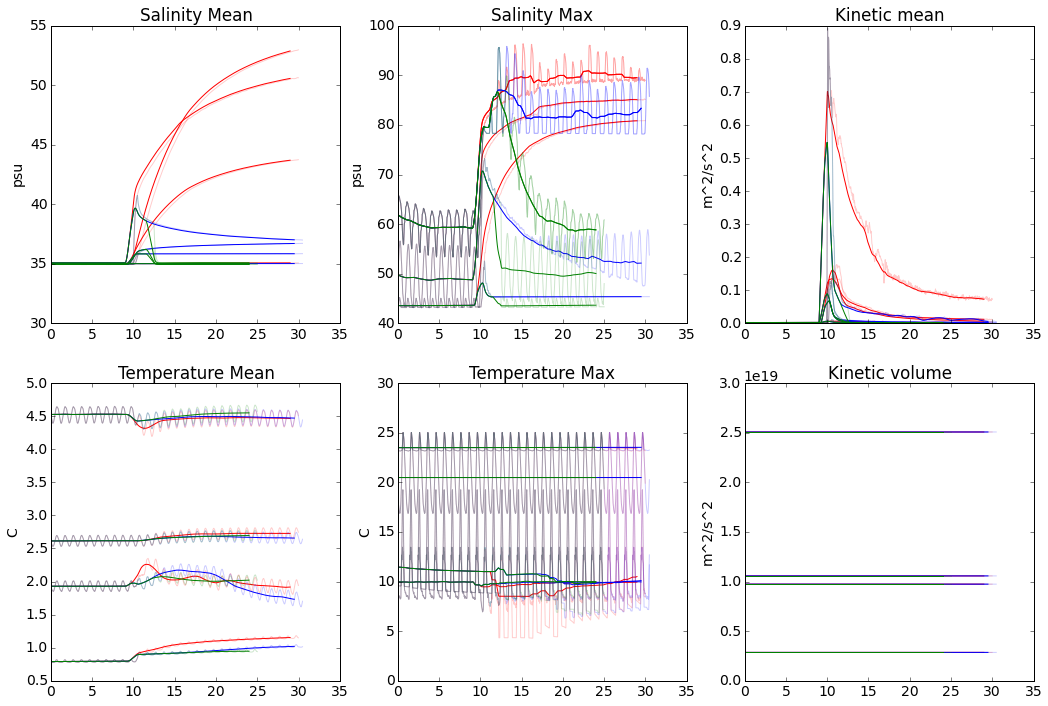

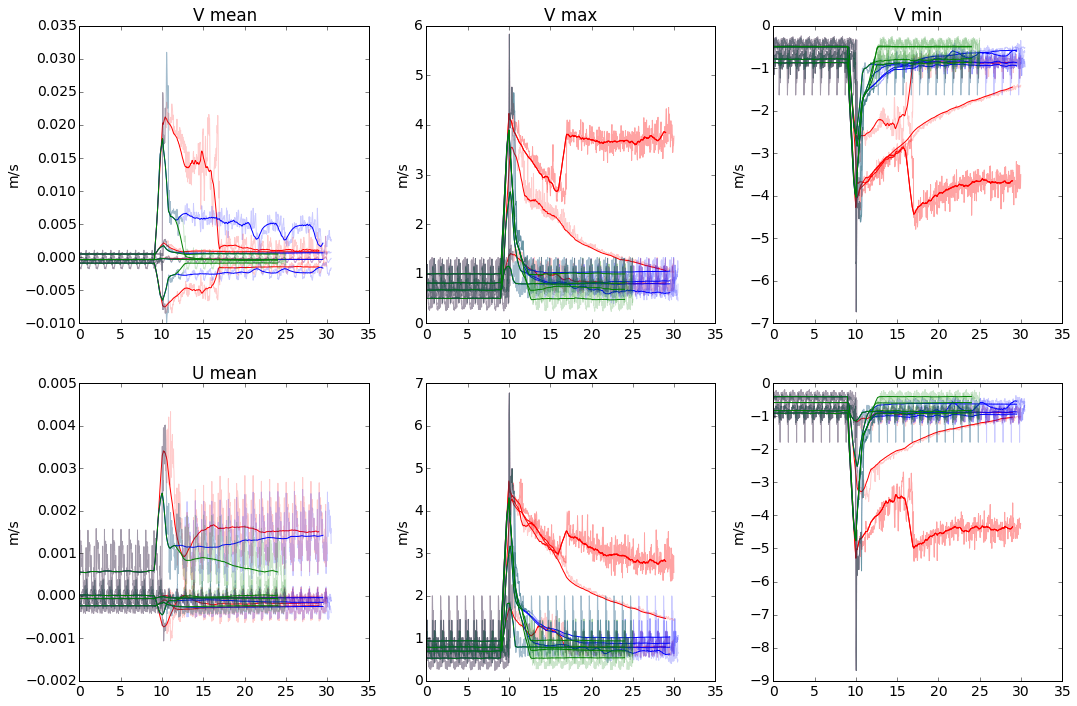

In [57]:
plot_dynSt(pert,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],'all')
plot_dynSt(pert,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],'all')

Constant red
No restoring blue
Restoring green
Constant red
No restoring blue
Restoring green


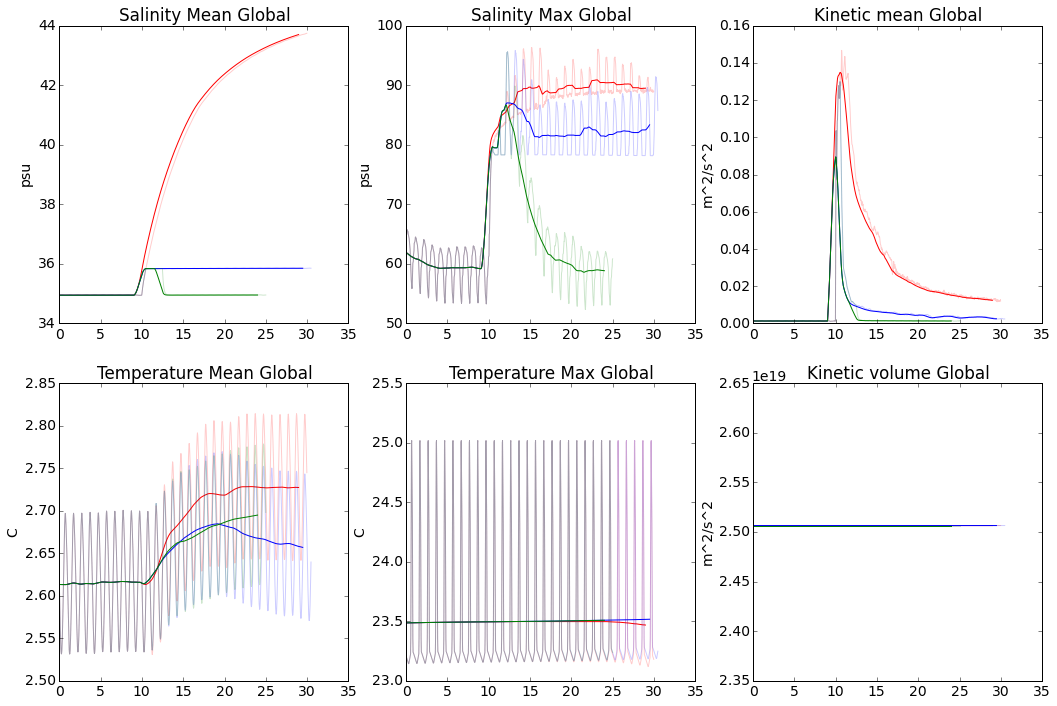

In [58]:
plot_dynSt(pert,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],0)
plot_dynSt(pert,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],0)

Constant red
No restoring blue
Restoring green
Constant red
No restoring blue
Restoring green


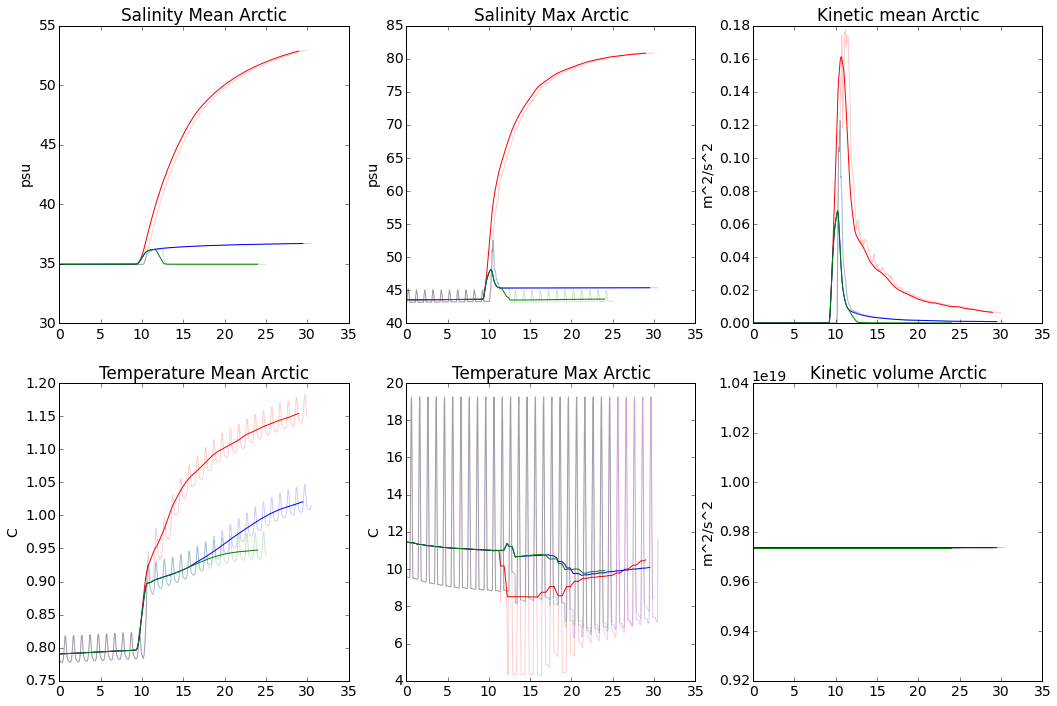

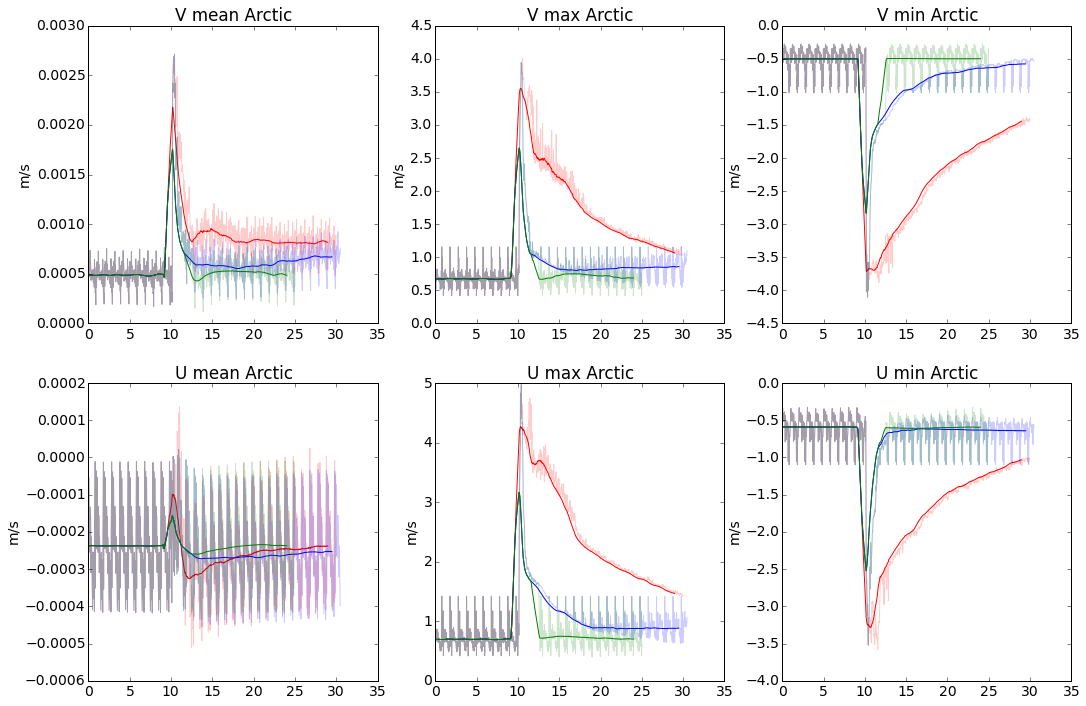

In [59]:
plot_dynSt(pert,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],1)
plot_dynSt(pert,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],1)

Constant red
No restoring blue
Restoring green
Constant red
No restoring blue
Restoring green


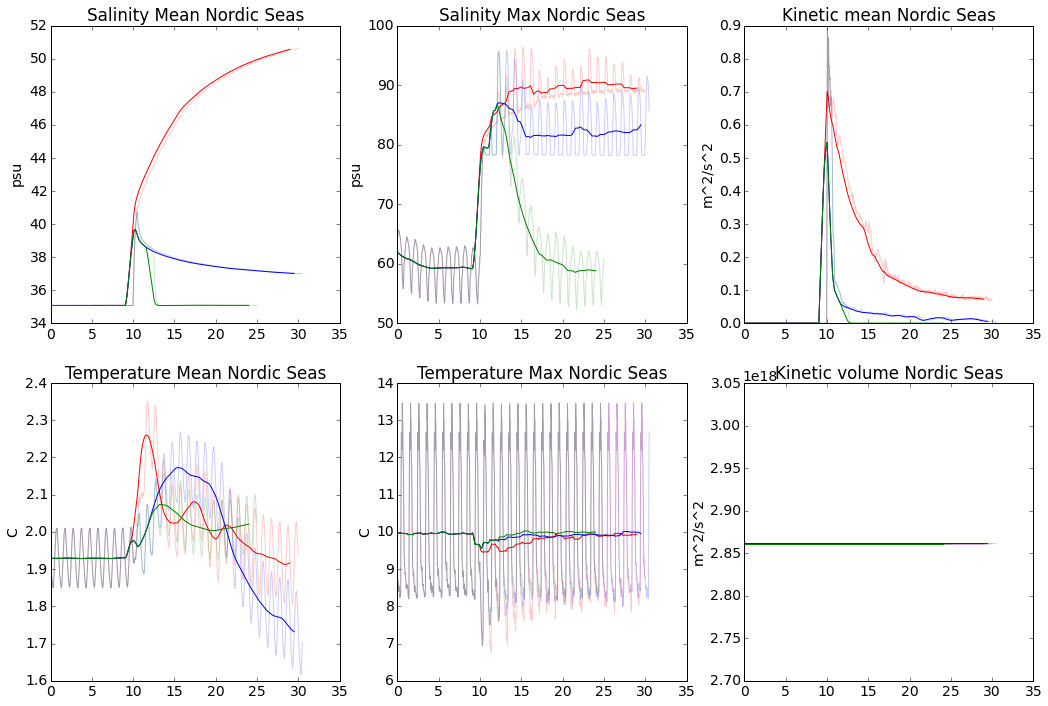

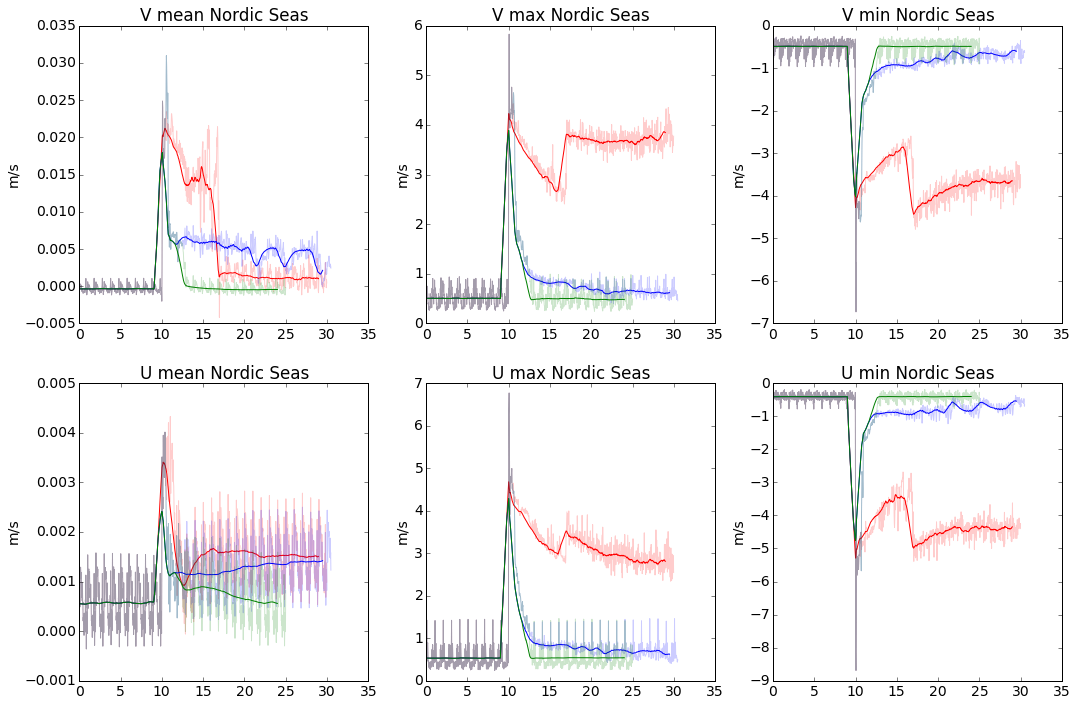

In [60]:
plot_dynSt(pert,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],2)
plot_dynSt(pert,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],2)

Constant red
No restoring blue
Restoring green
Constant red
No restoring blue
Restoring green


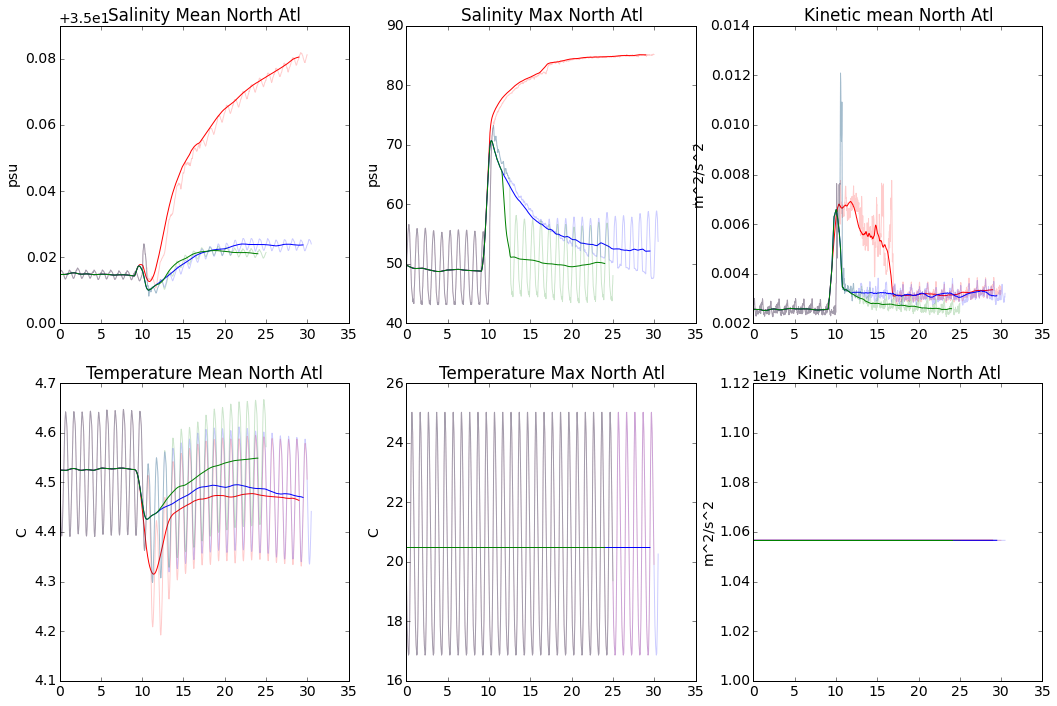

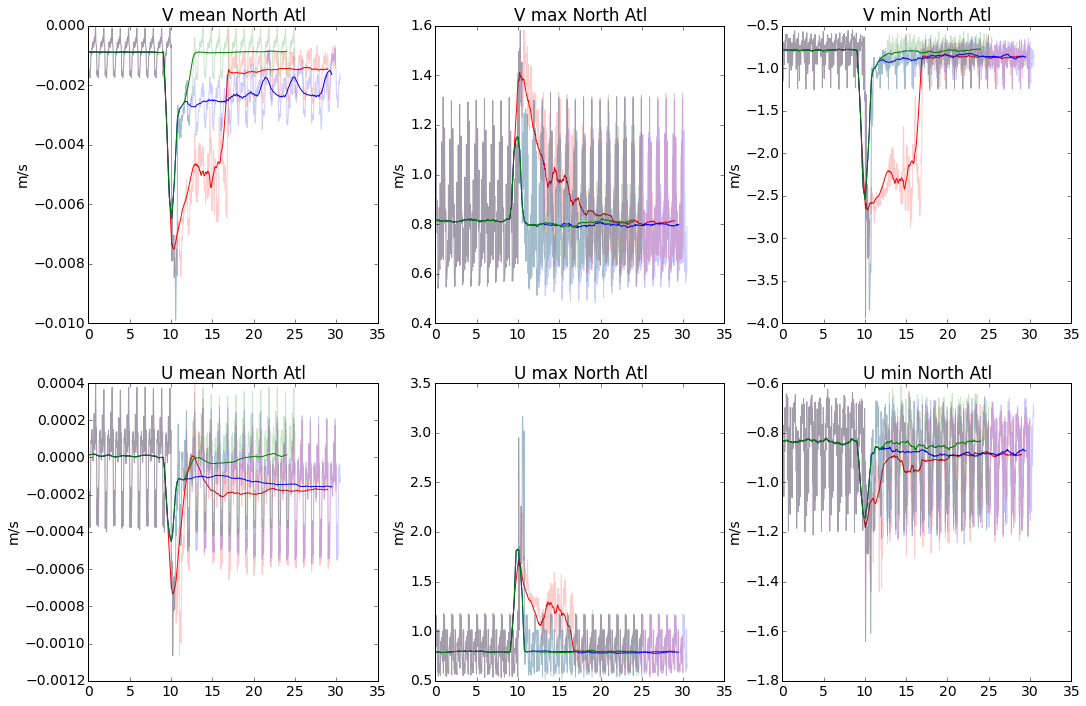

In [61]:
plot_dynSt(pert,['salt_mean','salt_max','ke_mean','theta_mean','theta_max','ke_vol'],3)
plot_dynSt(pert,['vvel_mean','vvel_max','vvel_min','uvel_mean','uvel_max','uvel_min'],3)

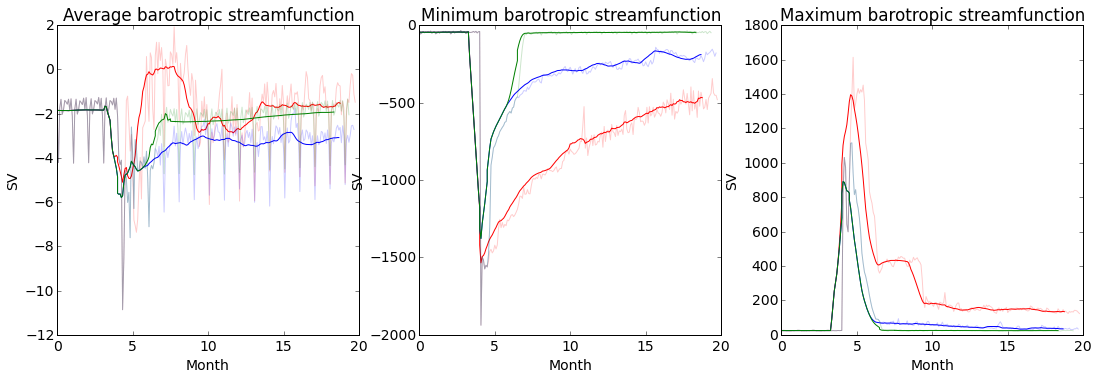

In [62]:
def plot_psi(monitor_list,vimin,vimax,cmap,row=1,col=3):
    fig, axes = plt.subplots(nrows=row, ncols=col)
    for mon_v in monitor_list:        #print mon
        axes.flat[0].plot(monitor_list[mon_v].years,monitor_list[mon_v].psi_mean,monitor_list[mon_v].color,alpha=0.2)
        axes.flat[0].plot(monitor_list[mon_v].years[0:-12],runningMeanFast(monitor_list[mon_v].psi_mean,12)[0:-12],monitor_list[mon_v].color)
        axes.flat[0].set_xlabel('Month')
        axes.flat[0].set_ylabel('SV')
        axes.flat[0].set_title('Average barotropic streamfunction')
        
        axes.flat[1].plot(monitor_list[mon_v].years,monitor_list[mon_v].psi_min,monitor_list[mon_v].color,alpha=0.2)
        axes.flat[1].plot(monitor_list[mon_v].years[0:-12],runningMeanFast(monitor_list[mon_v].psi_min,12)[0:-12],monitor_list[mon_v].color)
        axes.flat[1].set_xlabel('Month')
        axes.flat[1].set_ylabel('SV')
        axes.flat[1].set_title('Minimum barotropic streamfunction')
        
        axes.flat[2].plot(monitor_list[mon_v].years,monitor_list[mon_v].psi_max,monitor_list[mon_v].color,alpha=0.2)
        axes.flat[2].plot(monitor_list[mon_v].years[0:-12],runningMeanFast(monitor_list[mon_v].psi_max,12)[0:-12],monitor_list[mon_v].color)
        axes.flat[2].set_xlabel('Month')
        axes.flat[2].set_ylabel('SV')
        axes.flat[2].set_title('Maximum barotropic streamfunction')
        
    fig.subplots_adjust(right=2.5,top=1.2)
plot_psi(pert,-1,7,matplotlib.cm.jet)

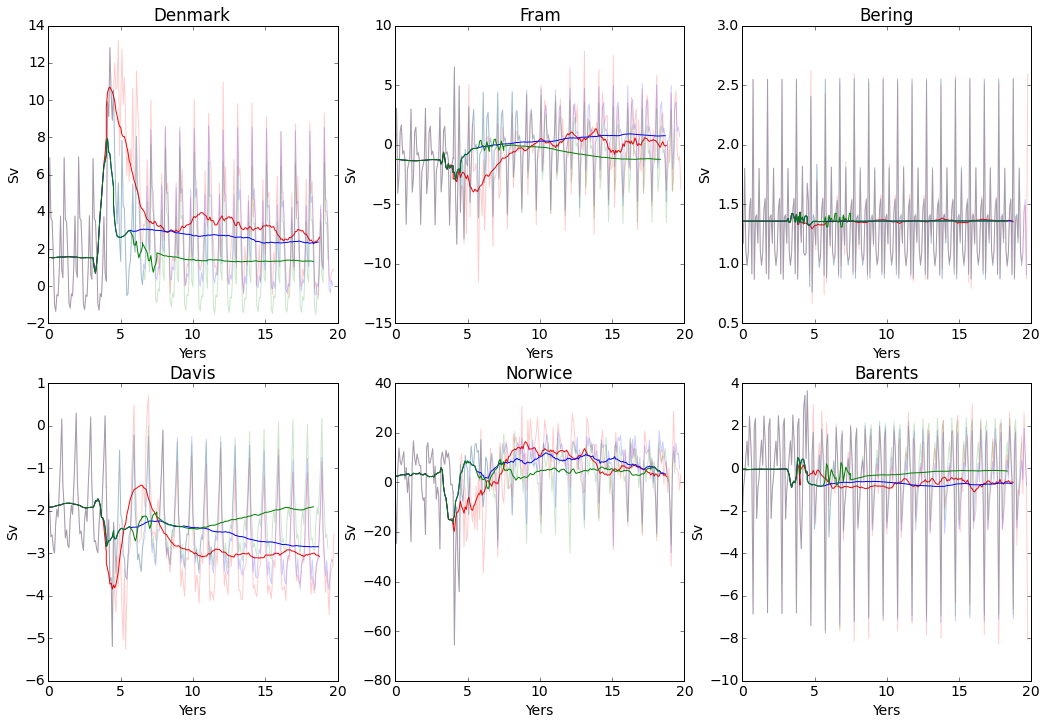

In [29]:
def plot_flux(monitor_list,var_list,flux,row=2,col=3):
    # this function is meant to plot monitor variables   
    fig, axes = plt.subplots(row,col)
    ax_ind = 0
    for var in var_list:
        for mon in monitor_list:
            axes.flat[ax_ind].plot(monitor_list[mon].years,monitor_list[mon].fluxes[var][flux]/10**6,monitor_list[mon].color,alpha=0.2)
            axes.flat[ax_ind].plot(monitor_list[mon].years[0:-12],runningMeanFast(monitor_list[mon].fluxes[var][flux]/10**6,12)[0:-12],monitor_list[mon].color)
            axes.flat[ax_ind].set_title(var)
            axes.flat[ax_ind].set_ylabel('Sv')
            axes.flat[ax_ind].set_xlabel('Yers')
        ax_ind += 1

    fig.subplots_adjust(right=2.4,top=2.4)
varlist = {'Fram' : 'Fram' , 'Bering' : 'Bering' , 'Barents':'Barents','Davis':'Davis','Denmark':'Denmark','Norwice':'Norwice'}
plot_flux(pert,varlist,'FluxSum')

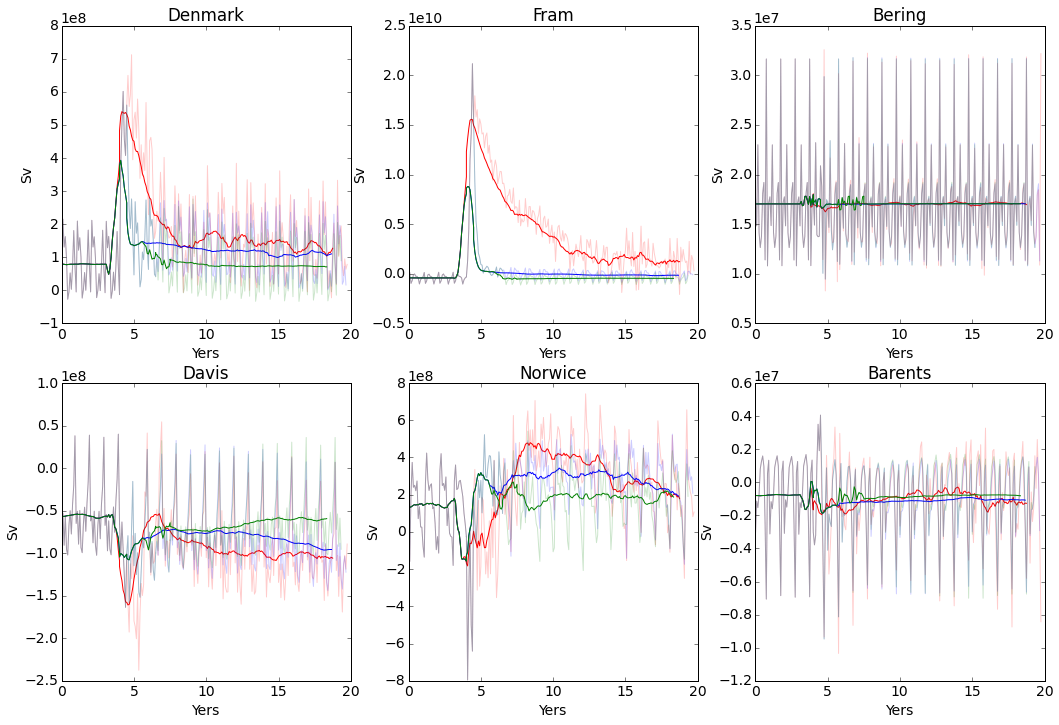

In [30]:
plot_flux(pert,varlist,'FluxSumS')

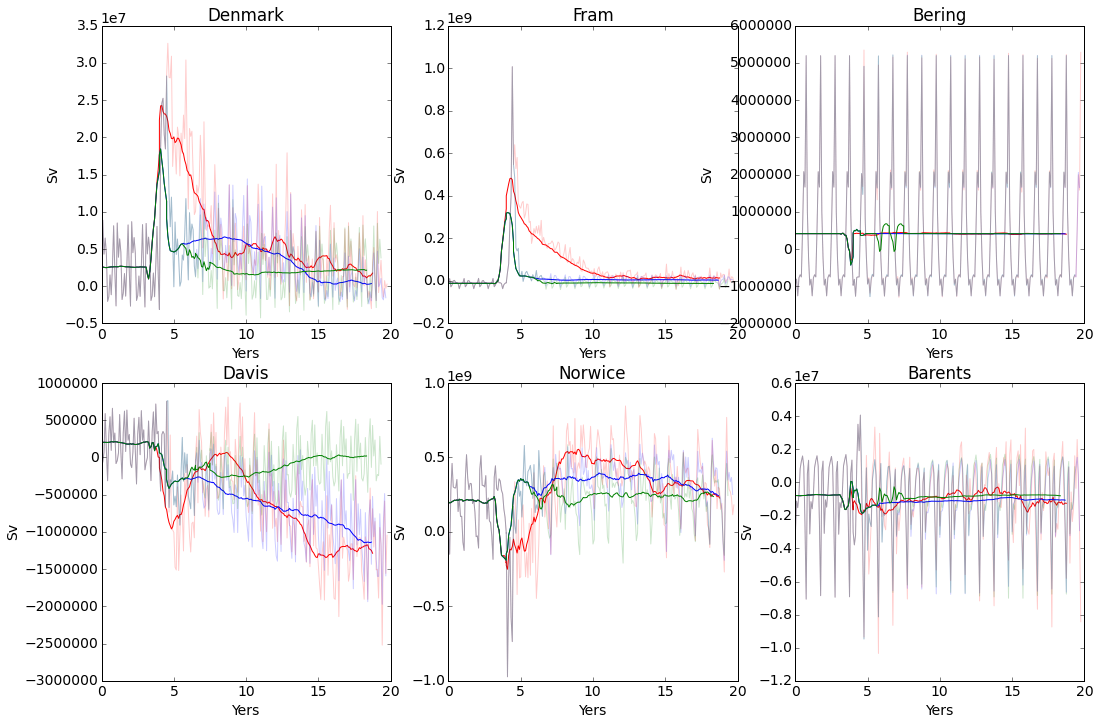

In [36]:
plot_flux(pert,varlist,'FluxSumT')

In [83]:
CORE_spinup = RunRead()
CORE_spinup.getPath('/hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/')
CORE_spinup.readStateData(range(720-12,720,1))
CORE_spinup.fluxCalc()
CORE_spinup.title('CORE spinup','black')

Data read from /hpcdata/scratch/am8e13/cs_36km_tutorial/run_spinup_CORE/results/


In [91]:
liq10,core2,obs = lit_data();
for var in ['Barents','Bering','Fram','Davis']:
    print var
    print 'No Rest' , pert_norest.totalFluxes[var]
    print 'Resto' , pert_rest.totalFluxes[var]
    print 'Const' , pert_const.totalFluxes[var]
    print 'No pert' , CORE_spinup.totalFluxes[var]
    print 'Core2 ',core2[var]
    print 'obsv  ',obs[var]

 Barents
No Rest {'Outflow': -3.71, 'Total flow': -0.56, 'Inflow': 3.15}
Resto {'Outflow': -3.68, 'Total flow': -0.24, 'Inflow': 3.45}
Const {'Outflow': -3.97, 'Total flow': -0.58, 'Inflow': 3.4}
No pert {'Outflow': -3.66, 'Total flow': -0.07, 'Inflow': 3.59}
Core2  {'Outflow': [], 'Total flow': 2.53, 'Inflow': []}
obsv   {'Outflow': 4.1, 'Total flow': '2-2.3', 'Inflow': -1.2}
Bering
No Rest {'Outflow': -0.02, 'Total flow': 1.36, 'Inflow': 1.38}
Resto {'Outflow': -0.02, 'Total flow': 1.36, 'Inflow': 1.38}
Const {'Outflow': -0.02, 'Total flow': 1.36, 'Inflow': 1.38}
No pert {'Outflow': -0.02, 'Total flow': 1.36, 'Inflow': 1.38}
Core2  {'Outflow': [], 'Total flow': 0.99, 'Inflow': []}
obsv   {'Outflow': [], 'Total flow': '0.8+/-0.2', 'Inflow': []}
Fram
No Rest {'Outflow': -24.33, 'Total flow': -0.07, 'Inflow': 24.26}
Resto {'Outflow': -18.84, 'Total flow': -0.85, 'Inflow': 17.99}
Const {'Outflow': -59.49, 'Total flow': -0.71, 'Inflow': 58.78}
No pert {'Outflow': -6.43, 'Total flow': -1.2